In [1]:
import cobra

In [2]:
from cobra import Model,Reaction,Metabolite

In [3]:
model=Model('model_task2')

#### ----> glc

In [4]:
v0=Reaction('v0')
v0.name='v0'
v0.lower_bound=1
v0.upper_bound=1

In [5]:
glc=Metabolite('glc',compartment='c')

In [6]:
v0.add_metabolites({glc:1})

##### glc=======>AA

In [7]:
v1=Reaction('v1')
v1.name='v1'
v1.lower_bound=0
v1.upper_bound=1000

In [8]:
AA=Metabolite('AA',compartment='c')

In [9]:
v1.add_metabolites({glc:-1,AA:1})

#####  AA=======>Biomass

In [10]:
v2=Reaction('v2')
v2.name='v2'
v2.lower_bound=0
v2.upper_bound=1000

In [11]:
Biomass=Metabolite('Biomass',compartment='c')

In [12]:
v2.add_metabolites({AA:-9.09,Biomass:1})

##### Biomass=======>

In [13]:
M=Reaction('M')
M.name='M'
M.lower_bound=0
M.upper_bound=1000

In [14]:
Biomass=Metabolite('Biomass',compartment='c')

In [15]:
M.add_metabolites({Biomass:-1})

In [16]:
model.add_reactions([v0,v1,v2,M])

In [17]:
model.objective='M'

In [18]:
y=model.optimize()

In [19]:
y

,fluxes,reduced_costs
v0,1.000000,0.220022
v1,1.000000,0.000000
v2,0.110011,0.000000
M,0.110011,0.000000


In [20]:
x=y.fluxes

In [21]:
import cobra
from cobra import *

#### save model in current working directory

In [22]:
cobra.io.save_json_model(model,"model_task2.json")

In [23]:
from escher import Builder

#### load model from current working directory

In [24]:
cobra.io.load_json_model("model_task2.json")

Name,model_task2
Memory address,0x01f6e915fd00
Number of metabolites,3
Number of reactions,4
Number of groups,0
Objective expression,1.0*M - 1.0*M_reverse_69691
Compartments,c


In [25]:
build = Builder(model_json="model_task2.json")

In [26]:
build.reaction_data=x

In [27]:
build

Builder(reaction_data={'v0': 1.0, 'v1': 1.0, 'v2': 0.11001100110011001, 'M': 0.11001100110011001})

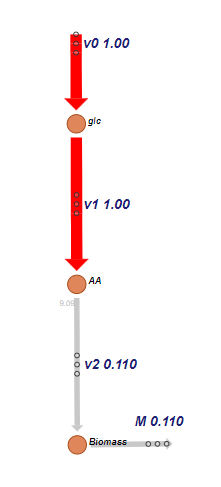